# Dimension reduction

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from context import *

## Similar medicine

In this exercice, we wish to identify medicine prescribed in similar situation.
For this purpose, we want to create a 2D embedding of medicines.

- Create a feature that groups the same medicine with different packages into the same category.

- Create for each medicine the relative fraction of prescribed boxes as a funciton of specialty, age and sex.

- Apply dimension reduction on this set of features and extract insight from the obtained structure.

In this exercice, we will describe medicines in term of the relative amount of prescription per medical specialty, age and sex of the patient.

In [ ]:
fn = INTDIR / "OPEN_MEDIC_2019.parquet"
df = pd.read_parquet(fn)
df.head()

atc1                           l_atc1 atc2                        l_atc2  \
0    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
1    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
2    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
3    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
4    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   

   atc3                        l_atc3   atc4  \
0  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
1  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
2  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
3  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
4  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   

                                   l_atc4     atc5           l_atc5  ...  \
0  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
1  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
2  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
3  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
4  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   

   gen_num age sexe  boites    rem     bse               l_psp_spe  \
0        0   0    1     113  53.31  191.53       MEDECINE GENERALE   
1        0   0    1     152  77.60  258.68               PEDIATRIE   
2        0   0    1      74  33.50  126.72  PRESCRIPTEURS SALARIES   
3        0   0    1      13   6.56   21.87                  AUTRES   
4        0   0    1     106  39.47  136.74       MEDECINE GENERALE   

                             l_ben_reg       name taux_rembourse  
0  Régions et Départements d'outre-mer  ZYMAFLUOR       0.278338  
1  Régions et Départements d'outre-mer  ZYMAFLUOR       0.299985  
2  Régions et Départements d'outre-mer  ZYMAFLUOR       0.264362  
3  Régions et Départements d'outre-mer  ZYMAFLUOR       0.299954  
4                        Ile-de-France  ZYMAFLUOR       0.288650  

[5 rows x 23 columns]

In [ ]:
df["age"].value_counts()

60    813342
20    751735
0     259841
99     11166
Name: age, dtype: int64

In [ ]:
table = pd.pivot_table(
    df,
    index="name",
    columns=["l_psp_spe", "age", "sexe"],
    values="boites",
    aggfunc="sum",
    fill_value=0,
)
table

l_psp_spe        ANATOMIE-CYTOLOGIE-PATHOLOGIQUE        \
age                                           20    60   
sexe                                           1  2  2   
name                                                     
A313                                           0  0  0   
ABACAVIR                                       0  0  0   
ABACAVIR/LAM                                   0  0  0   
ABACAVIR/LAM/ZID                               0  0  0   
ABASAGLAR                                      0  0  0   
...                                          ... .. ..   
ZYMADUO                                        0  0  0   
ZYMAFLUOR                                      0  0  0   
ZYPREXA                                        0  0  0   
ZYRTEC                                         0  0  0   
ZYTIGA                                         0  0  0   

l_psp_spe        ANESTHESIOLOGIE - REANIMATION                 AUTRES  ...  \
age                                         0     20     60        0   ...   
sexe                                         1  2  1  2   1  2      1  ...   
name                                                                   ...   
A313                                         0  0  0  0   0  0      0  ...   
ABACAVIR                                     0  0  0  0   0  0      0  ...   
ABACAVIR/LAM                                 0  0  0  0   0  0      0  ...   
ABACAVIR/LAM/ZID                             0  0  0  0   0  0      0  ...   
ABASAGLAR                                    0  0  0  0   0  0      0  ...   
...                                        ... .. .. ..  .. ..    ...  ...   
ZYMADUO                                      0  0  0  0   0  0     12  ...   
ZYMAFLUOR                                    0  0  0  0   0  0   2946  ...   
ZYPREXA                                      0  0  0  0   0  0      0  ...   
ZYRTEC                                       0  0  0  0   0  0      0  ...   
ZYTIGA                                       0  0  0  0  27  0      0  ...   

l_psp_spe        VALEUR INCONNUE                                           
age                           0    20             60           99          
sexe                           9    1    2   9     1     2   9  1  2    9  
name                                                                       
A313                           0  343  639   0   456   449   0  0  0    0  
ABACAVIR                       0  210    0   0    34     0   0  0  0    0  
ABACAVIR/LAM                   0  654  257   0   613   142   0  0  0    0  
ABACAVIR/LAM/ZID               0   55    0   0     0     0   0  0  0    0  
ABASAGLAR                      0  943  707   0  1249  1216   0  0  0   22  
...                          ...  ...  ...  ..   ...   ...  .. .. ..  ...  
ZYMADUO                        0  185  191   0    89   262   0  0  0    0  
ZYMAFLUOR                      0  582  709   0   456   391   0  0  0    0  
ZYPREXA                        0  997  694  35  1676  1198  36  0  0  178  
ZYRTEC                         0  239  441  21   191   361  23  0  0    0  
ZYTIGA                         0  759    0   0  1090     0   0  0  0   26  

[1982 rows x 164 columns]

In [ ]:
total_sold = table.sum(axis=1)
total_sold

name
A313                 42606
ABACAVIR              2938
ABACAVIR/LAM         57228
ABACAVIR/LAM/ZID       483
ABASAGLAR           709122
                     ...  
ZYMADUO             346364
ZYMAFLUOR            55905
ZYPREXA             128786
ZYRTEC               65715
ZYTIGA               78046
Length: 1982, dtype: int64

In [ ]:
# Here the reshape is meant to allow broadcasting : https://numpy.org/devdocs/user/theory.broadcasting.html
table = table / total_sold.values.reshape(-1, 1)
table

l_psp_spe        ANATOMIE-CYTOLOGIE-PATHOLOGIQUE            \
age                                           20        60   
sexe                                           1    2    2   
name                                                         
A313                                         0.0  0.0  0.0   
ABACAVIR                                     0.0  0.0  0.0   
ABACAVIR/LAM                                 0.0  0.0  0.0   
ABACAVIR/LAM/ZID                             0.0  0.0  0.0   
ABASAGLAR                                    0.0  0.0  0.0   
...                                          ...  ...  ...   
ZYMADUO                                      0.0  0.0  0.0   
ZYMAFLUOR                                    0.0  0.0  0.0   
ZYPREXA                                      0.0  0.0  0.0   
ZYRTEC                                       0.0  0.0  0.0   
ZYTIGA                                       0.0  0.0  0.0   

l_psp_spe        ANESTHESIOLOGIE - REANIMATION                                \
age                                         0         20             60        
sexe                                         1    2    1    2         1    2   
name                                                                           
A313                                       0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR                                   0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR/LAM                               0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR/LAM/ZID                           0.0  0.0  0.0  0.0  0.000000  0.0   
ABASAGLAR                                  0.0  0.0  0.0  0.0  0.000000  0.0   
...                                        ...  ...  ...  ...       ...  ...   
ZYMADUO                                    0.0  0.0  0.0  0.0  0.000000  0.0   
ZYMAFLUOR                                  0.0  0.0  0.0  0.0  0.000000  0.0   
ZYPREXA                                    0.0  0.0  0.0  0.0  0.000000  0.0   
ZYRTEC                                     0.0  0.0  0.0  0.0  0.000000  0.0   
ZYTIGA                                     0.0  0.0  0.0  0.0  0.000346  0.0   

l_psp_spe           AUTRES  ... VALEUR INCONNUE                                \
age                     0   ...              0         20                       
sexe                     1  ...               9         1         2         9   
name                        ...                                                 
A313              0.000000  ...             0.0  0.008051  0.014998  0.000000   
ABACAVIR          0.000000  ...             0.0  0.071477  0.000000  0.000000   
ABACAVIR/LAM      0.000000  ...             0.0  0.011428  0.004491  0.000000   
ABACAVIR/LAM/ZID  0.000000  ...             0.0  0.113872  0.000000  0.000000   
ABASAGLAR         0.000000  ...             0.0  0.001330  0.000997  0.000000   
...                    ...  ...             ...       ...       ...       ...   
ZYMADUO           0.000035  ...             0.0  0.000534  0.000551  0.000000   
ZYMAFLUOR         0.052697  ...             0.0  0.010411  0.012682  0.000000   
ZYPREXA           0.000000  ...             0.0  0.007742  0.005389  0.000272   
ZYRTEC            0.000000  ...             0.0  0.003637  0.006711  0.000320   
ZYTIGA            0.000000  ...             0.0  0.009725  0.000000  0.000000   

l_psp_spe                                                          
age                     60                      99                 
sexe                     1         2        9    1    2         9  
name                                                               
A313              0.010703  0.010538  0.00000  0.0  0.0  0.000000  
ABACAVIR          0.011572  0.000000  0.00000  0.0  0.0  0.000000  
ABACAVIR/LAM      0.010712  0.002481  0.00000  0.0  0.0  0.000000  
ABACAVIR/LAM/ZID  0.000000  0.000000  0.00000  0.0  0.0  0.000000  
ABASAGLAR         0.001761  0.001715  0.00000  0.0  0.0  0.000031  
...                    ...       ...    

In [ ]:
from umap import UMAP

red = UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=20)

In [ ]:
transformed = red.fit_transform(table)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


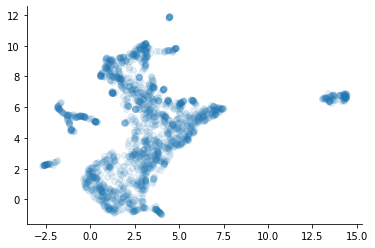

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[:, 0], transformed[:, 1], alpha=0.1);

With this embedding we can already perform several observations on this dataset.
First, there are 3 small clusters of very independent medicine.
The third cluster also has this Y shape, which seems to indicate that there is a hierarchy within this cluster.
Then we have a very large cluster in the center with medicines which tend to be used in multiple situation.
However, this cluster is not spherical, this is indicative of structure within the cluster. 
Again, if one was interested in the topic, it would be nice to understand the specificities of each clusters.

In the long history of studies of this dataset, we will once again focus on doliprane.
We will see where the analgesics lie in this embedding, and specifically the doliprane.
We observe that most analgesics lie in the top middle of the central cluster, in the same area as the doliprane (in black).
There is definitely a meaning in this representation.
Even the highly addictive morphine (in green) is close to doliprane.
Conversely, some analgesics are extremely far from the rest and may be of specific interest.

In [ ]:
analgesiques = table.index.isin(df.loc[df["atc2"] == "N02", "name"].drop_duplicates())
doliprane = table.index == "DOLIPRANE"
morphine = table.index == "MORPHINE"

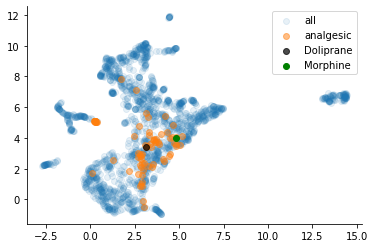

In [ ]:
fig, ax = plt.subplots()
ax.scatter(
    transformed[~analgesiques, 0], transformed[~analgesiques, 1], alpha=0.1, label="all"
)
ax.scatter(
    transformed[analgesiques, 0],
    transformed[analgesiques, 1],
    alpha=0.5,
    label="analgesic",
)
ax.scatter(
    transformed[doliprane, 0],
    transformed[doliprane, 1],
    alpha=0.7,
    color="black",
    label="Doliprane",
)
ax.scatter(
    transformed[morphine, 0],
    transformed[morphine, 1],
    alpha=1,
    color="green",
    label="Morphine",
)
ax.legend();

In this example, we have made an aribitrary choice of the high dimensional space, and of a metric.
For both these choices, there are many possible variations which will tell different stories.
In an exploration phase, it would be interesting to test multiple combinations.

## Similar patients
We have observed during the course on missing values that the patient dataset has many missing values, and that some missing values are correlated.
We have assumed that features are related to a set of symptoms or medical exam.
Apply dimension reduction on the binary variables of missing values to identify patients with similar pathologies.

In this exercice, we will create a new DataFrame which contains only wether a piece of information is present or not.
We can then apply dimension reduction to this dataset to identify patients which seemed to have had the same exams.

In [ ]:
fn = INTDIR / "patient.parquet"
df = pd.read_parquet(fn)
print(df.shape)
df.head()

(13533, 43)


age sex  visit_id    feat_0    feat_1  feat_2  feat_3  feat_4    feat_5  \
0   87   F      1226       NaN -1.979758     NaN     NaN     NaN -2.265400   
1   76   F      1194       NaN       NaN     NaN     NaN     NaN -0.222855   
2   57   M      2141       NaN       NaN     NaN     NaN     NaN  1.109240   
3    6   F      1750       NaN       NaN     NaN     NaN     NaN  1.642081   
4   63   M     11049  3.279681       NaN     NaN     NaN     NaN  1.730885   

   feat_6  ...  feat_30   feat_31  feat_32  feat_33   feat_34  feat_35  \
0     NaN  ...      NaN       NaN      NaN      NaN  0.912238      NaN   
1     NaN  ...      NaN       NaN      NaN      NaN -1.231702      NaN   
2     NaN  ...      NaN  0.148950      NaN      NaN  0.095499      NaN   
3     NaN  ...      NaN       NaN      NaN      NaN -1.333794      NaN   
4     NaN  ...      NaN  0.432363      NaN      NaN -1.946348      NaN   

   feat_36  feat_37   feat_38  feat_39  
0      NaN      NaN       NaN      NaN  
1      NaN      NaN       NaN      NaN  
2      NaN      NaN       NaN      NaN  
3      NaN      NaN       NaN      NaN  
4      NaN      NaN  1.214093      NaN  

[5 rows x 43 columns]

In [ ]:
feat_df = df[[c for c in df.columns if c.startswith("feat")]]
feat_df = feat_df.isnull().astype(np.int8)
feat_df.head()

feat_0  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
0       1       0       1       1       1       0       1       1       1   
1       1       1       1       1       1       0       1       1       1   
2       1       1       1       1       1       0       1       1       1   
3       1       1       1       1       1       0       1       1       1   
4       0       1       1       1       1       0       1       1       1   

   feat_9  ...  feat_30  feat_31  feat_32  feat_33  feat_34  feat_35  feat_36  \
0       1  ...        1        1        1        1        0        1        1   
1       1  ...        1        1        1        1        0        1        1   
2       0  ...        1        0        1        1        0        1        1   
3       1  ...        1        1        1        1        0        1        1   
4       1  ...        1        0        1        1        0        1        1   

   feat_37  feat_38  feat_39  
0        1        1        1  
1        1        1        1  
2        1        1        1  
3        1        1        1  
4        1        0        1  

[5 rows x 40 columns]

In [ ]:
from umap import UMAP

red = UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=20)

In [ ]:
transformed = red.fit_transform(feat_df)
np.save(INTDIR / "patient_empty_reduction.npy", transformed)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[:, 0], transformed[:, 1], alpha=0.05);

We observe multiple clusters of patients scattered across the map.
We have multiple groups of patients that have had similar features missing.
Further analysis would help to identify what those clusters are made of.
It is important to notice that these clusters do not take into account the actual values of these features, only the fact that they are present or missing. 
They can be complementary information to consider.